In [1]:
#import libraries for ML and plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

## 1.Import Japanese Forest Dataset


In [2]:
# importing the Forest Dataset
df = pd.read_csv('../forest_dataset.csv') #Dataframe for training.csv

#Extract the training targets
y_df = df[['class']]
y=y_df.values
y=y.reshape(-1)
print(type(y),"y:",y.shape)
#print(y)

#Extract the training data
df.drop(['class'],1,inplace=True)
X = df.values

print(type(X),"X:",X.shape)
#print(X)

<class 'numpy.ndarray'> y: (523,)
<class 'numpy.ndarray'> X: (523, 27)


In [3]:
#Split Dataset into Trainset and Testset 
#80 % for training and 20% for testting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2. Obtain train/test  accuracy
Obtain the accuracy of the train/test datasets, using a range (1,100) of estimators.


In [4]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.781


In [5]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.945
Accuracy on test set: 0.857


In [6]:
tree = DecisionTreeClassifier(min_samples_split=15, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.945
Accuracy on test set: 0.838


Max Training accuracy: 1.0 max_depth= 12
Max test accuracy: 0.8571428571428571 max_depth= 1


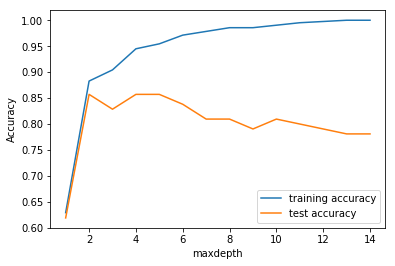

In [16]:
#Initialize the lists
training_accuracy = []
test_accuracy = []
%matplotlib inline
depth_range = range(1, 15)
for maxdepth in depth_range:
    # builds a classification model
    tree = DecisionTreeClassifier(max_depth=maxdepth, random_state=0)    
    tree.fit(X_train, y_train)
    #  write the "training set accuracy"
    training_accuracy.append(tree.score(X_train, y_train))
    # write the  "generalization accuracy"
    test_accuracy.append(tree.score(X_test, y_test))
plt.plot(depth_range, training_accuracy, label="training accuracy")
plt.plot(depth_range, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("maxdepth")
plt.legend()
print("Max Training accuracy:",max(training_accuracy),"max_depth=",training_accuracy.index(max(training_accuracy)))
print("Max test accuracy:",max(test_accuracy),"max_depth=",test_accuracy.index(max(test_accuracy)))

Max Training accuracy: 1.0 min_samples_split= 0
Max test accuracy: 0.8380952380952381 min_samples_split= 9


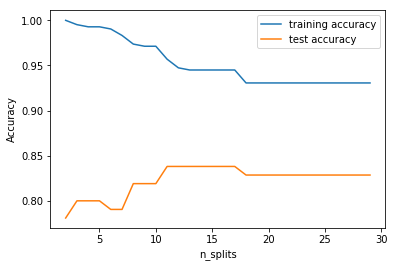

In [22]:
#Initialize the lists
training_accuracy = []
test_accuracy = []
%matplotlib inline
nsplits_range = range(2, 30)
for n_splits in nsplits_range:
    # builds a classification model
    tree = DecisionTreeClassifier(min_samples_split=n_splits, random_state=0)    
    tree.fit(X_train, y_train)
    #  write the "training set accuracy"
    training_accuracy.append(tree.score(X_train, y_train))
    # write the  "generalization accuracy"
    test_accuracy.append(tree.score(X_test, y_test))
plt.plot(nsplits_range, training_accuracy, label="training accuracy")
plt.plot(nsplits_range, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_splits")
plt.legend()
print("Max Training accuracy:",max(training_accuracy),"min_samples_split=",training_accuracy.index(max(training_accuracy)))
print("Max test accuracy:",max(test_accuracy),"min_samples_split=",test_accuracy.index(max(test_accuracy)))

## 3. Create plotting function for Cross-validation & Training Score

In [26]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

## 4. Obtain Cross-validation & Training Score 
Obtaining cross-validation with original dataset, using the value of C=test_accuracy.index(max(test_accuracy)) && C=training_accuracy.index(max(training_accuracy))

C= 0
C= 9


<module 'matplotlib.pyplot' from 'C:\\Users\\gollo\\Miniconda3\\envs\\tarea2\\lib\\site-packages\\matplotlib\\pyplot.py'>

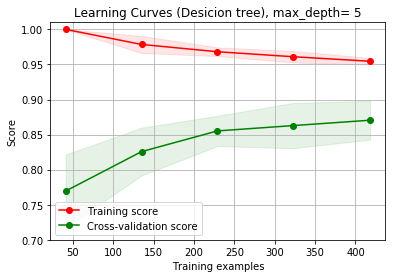

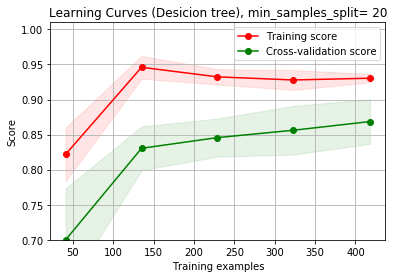

In [27]:
title = "Learning Curves (Desicion tree), max_depth= 5"
# SVC is more expensive so we do a lower number of CV iterations:
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(max_depth=5, random_state=0)    
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)




title = "Learning Curves (Desicion tree), min_samples_split= 20"
# SVC is more expensive so we do a lower number of CV iterations:
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier(min_samples_split=20, random_state=0)    
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)


 
    DESCRIPTION OF THE plot_learning_curve() FUNCTION:
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    

For more information about kNN classification, visit the following webpage: http://scikit-learn.org/stable/modules/tree.html